In [1]:
import pandas as pd
import os


file_dir = 'pdata/'

# Create an empty list to store the DataFrames
dfs = []

# Loop through the CSV files in the directory
for file_name in os.listdir(file_dir):
    if file_name.endswith('Zip.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(file_dir, file_name)
        df = pd.read_csv(file_path)
        # Fill null values with 0
        df.fillna(0, inplace=True)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
combined = pd.concat(dfs, ignore_index=True)


In [2]:
combined

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93202,1,2013,Elec- Agricultural,Y,0,0,0
1,93202,2,2013,Elec- Agricultural,Y,0,0,0
2,93202,3,2013,Elec- Agricultural,Y,0,0,0
3,93203,1,2013,Elec- Agricultural,Y,0,0,0
4,93203,2,2013,Elec- Agricultural,Y,0,0,0
...,...,...,...,...,...,...,...,...
334804,96137,11,2022,Elec- Residential,N,2800,1104827,395
334805,96137,12,2022,Elec- Residential,N,2802,1238649,442
334806,96162,10,2022,Elec- Residential,Y,0,0,0
334807,96162,11,2022,Elec- Residential,Y,0,0,0


In [3]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334809 entries, 0 to 334808
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ZIPCODE         334809 non-null  int64 
 1   MONTH           334809 non-null  int64 
 2   YEAR            334809 non-null  int64 
 3   CUSTOMERCLASS   334809 non-null  object
 4   COMBINED        334809 non-null  object
 5   TOTALCUSTOMERS  334809 non-null  int64 
 6   TOTALKWH        334809 non-null  int64 
 7   AVERAGEKWH      334809 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 20.4+ MB


In [4]:
combined = combined.drop(combined[combined['TOTALCUSTOMERS'] == 0].index)
combined = combined.reset_index(drop=True)
combined

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93206,2,2013,Elec- Agricultural,Y,138,7249627,52534
1,93206,3,2013,Elec- Agricultural,Y,371,20354832,54865
2,93212,2,2013,Elec- Agricultural,Y,213,9971956,46817
3,93230,2,2013,Elec- Agricultural,Y,244,3942702,16159
4,93245,2,2013,Elec- Agricultural,N,334,1008626,3020
...,...,...,...,...,...,...,...,...
152104,96125,11,2022,Elec- Residential,N,444,107063,241
152105,96125,12,2022,Elec- Residential,N,443,111975,253
152106,96137,10,2022,Elec- Residential,N,2800,892389,319
152107,96137,11,2022,Elec- Residential,N,2800,1104827,395


In [5]:
df2 = combined.groupby(['YEAR','MONTH'])['TOTALKWH'].sum().reset_index()
df2.columns = ['Year', 'Month', 'TotalKWH']

df2.head()

,Year,Month,TotalKWH
0,2013,1,5978136530
1,2013,2,5203377801
2,2013,3,5619019088
3,2013,4,5679660824
4,2013,5,6205509375


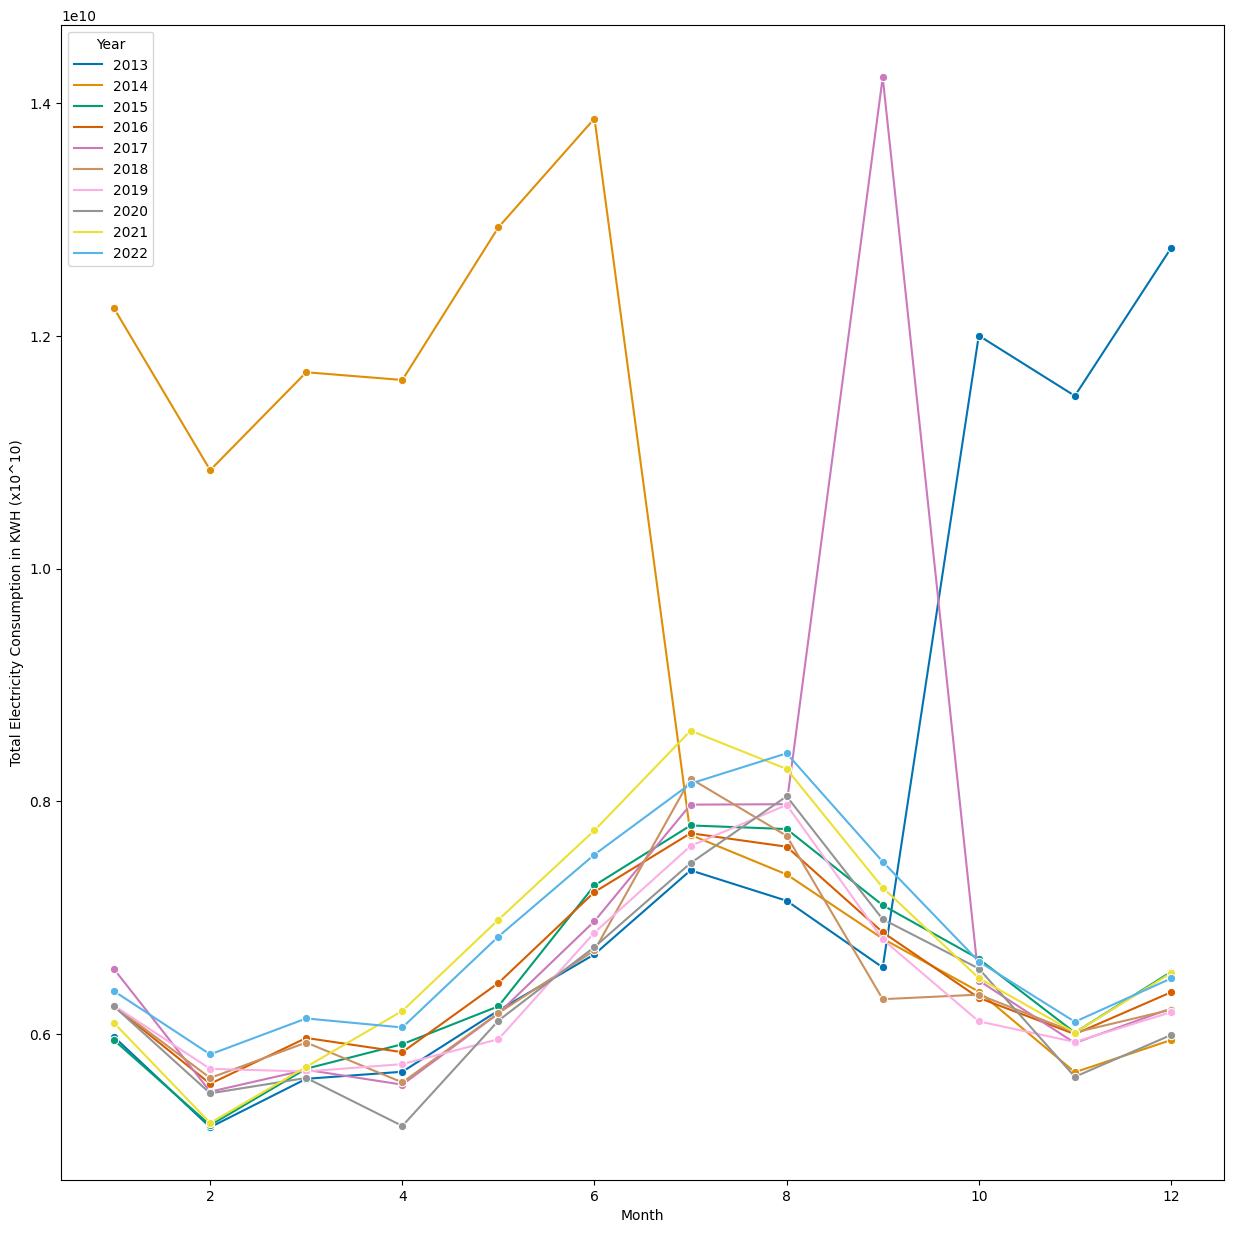

<Figure size 640x480 with 0 Axes>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

sns.lineplot(data=df2, x="Month", y="TotalKWH", hue="Year", marker='o', palette='colorblind')

plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption in KWH (x10^10)')



plt.show()
plt.savefig("monthsyear.png")

In [7]:
df3 = combined.groupby(['YEAR','MONTH'])['AVERAGEKWH'].mean().round().reset_index()
df3.columns = ['Year', 'Month', 'AVERAGEKWH']

df3.head()

,Year,Month,AVERAGEKWH
0,2013,1,10186.0
1,2013,2,9097.0
2,2013,3,10291.0
3,2013,4,11040.0
4,2013,5,10373.0


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        120 non-null    int64  
 1   Month       120 non-null    int64  
 2   AVERAGEKWH  120 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.9 KB


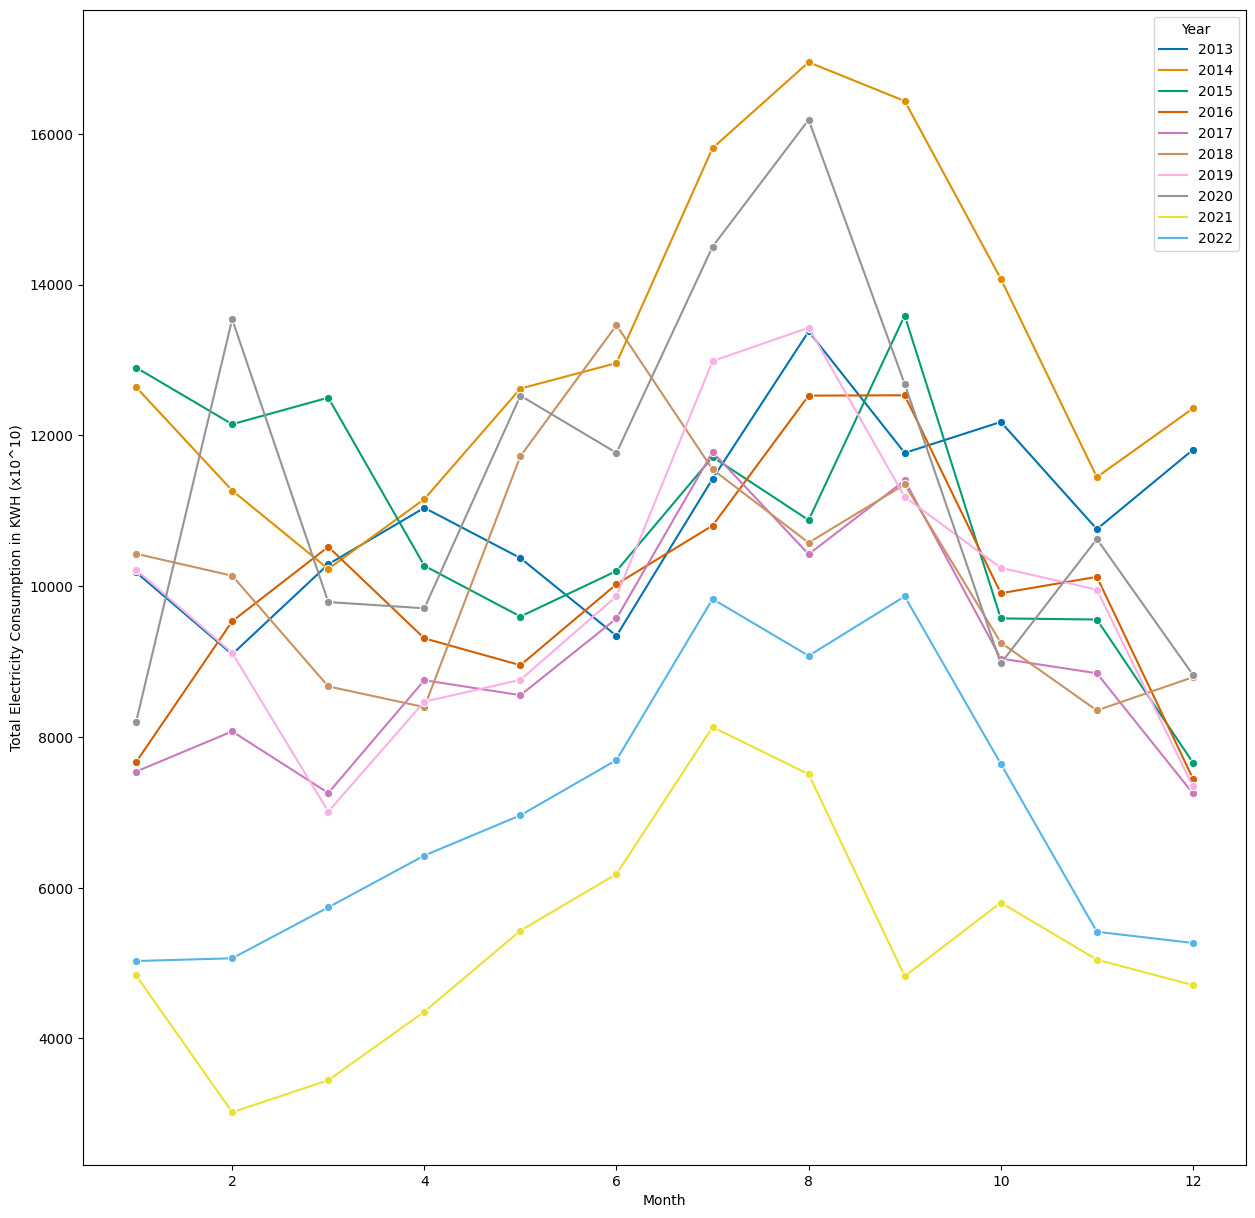

In [9]:
plt.figure(figsize=(15,15))

sns.lineplot(data=df3, x="Month", y="AVERAGEKWH", hue="Year", marker='o', palette='colorblind')
# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption in KWH (x10^10)')


# display the plot
plt.show()

In [10]:
df4 = combined.groupby(['YEAR','MONTH'])['TOTALCUSTOMERS'].sum().reset_index()
df4.columns = ['Year', 'Month', 'TOTALCUSTOMERS']

df4.head()

,Year,Month,TOTALCUSTOMERS
0,2013,1,4482747
1,2013,2,4503517
2,2013,3,4524194
3,2013,4,4542244
4,2013,5,4553670


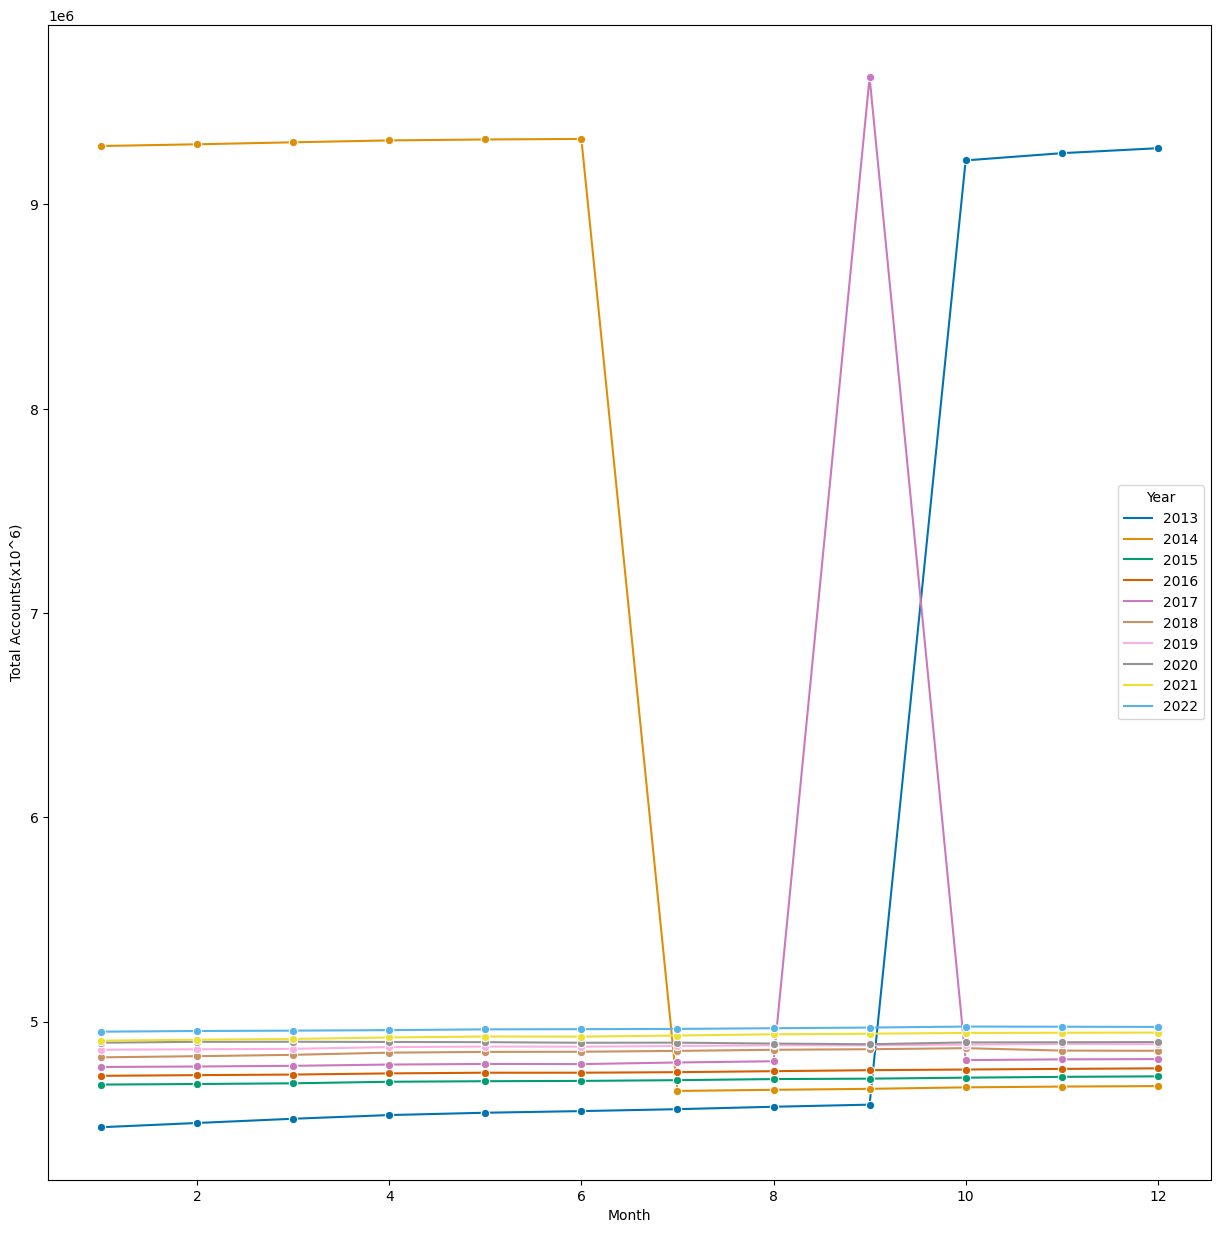

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(15,15))

sns.lineplot(data=df4, x="Month", y="TOTALCUSTOMERS", hue="Year", marker='o', palette='colorblind')
# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Total Accounts(x10^6)')


# display the plot
plt.show()
plt.savefig("monthyearumeme.png")

Drop the outliers for years 2013,2014 and 2017

In [12]:
df = combined.drop(combined[combined['YEAR'].isin([2013, 2014, 2017])].index)

In [13]:
!pip install xgboost

In [14]:
import xgboost as xgb

In [15]:
df

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
38598,93201,1,2015,Elec- Residential,N,307,212381,692
38599,93203,1,2015,Elec- Agricultural,Y,169,2686403,15896
38600,93203,1,2015,Elec- Commercial,Y,447,4137391,9256
38601,93203,1,2015,Elec- Residential,Y,4554,2064431,453
38602,93204,1,2015,Elec- Residential,N,2245,1112213,495
...,...,...,...,...,...,...,...,...
152104,96125,11,2022,Elec- Residential,N,444,107063,241
152105,96125,12,2022,Elec- Residential,N,443,111975,253
152106,96137,10,2022,Elec- Residential,N,2800,892389,319
152107,96137,11,2022,Elec- Residential,N,2800,1104827,395


In [16]:
features = ['MONTH','YEAR']
target = 'TOTALKWH'

In [17]:
#pip install scikit-learn

In [18]:
#pip install -U scikit-learn

In [19]:
model = xgb.XGBRegressor()
model.fit(df[features], df[target])


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
# Create a new dataframe for future predictions
future_dates = pd.date_range(start='2027-01-01', end='2027-12-31', freq='M')
future_data = pd.DataFrame({

    'MONTH': future_dates.month,
    'YEAR': future_dates.year
})

In [21]:
# Make predictions on the future data
predictions = model.predict(future_data[features])

In [22]:
future_data['TOTALKWH'] = predictions

In [27]:
future_data.columns = ['Month', 'Year', 'TotalKWH']

In [28]:
future_data

,Month,Year,TotalKWH
0,1,2027,6227884.5
1,2,2027,5519711.0
2,3,2027,5630494.0
3,4,2027,5464115.0
4,5,2027,6096811.0
5,6,2027,6571875.0
6,7,2027,7114834.5
7,8,2027,7458666.0
8,9,2027,6717164.0
9,10,2027,6274550.5


In [26]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      12 non-null     int64  
 1   Month     12 non-null     int64  
 2   TotalKWH  12 non-null     float32
dtypes: float32(1), int64(2)
memory usage: 368.0 bytes


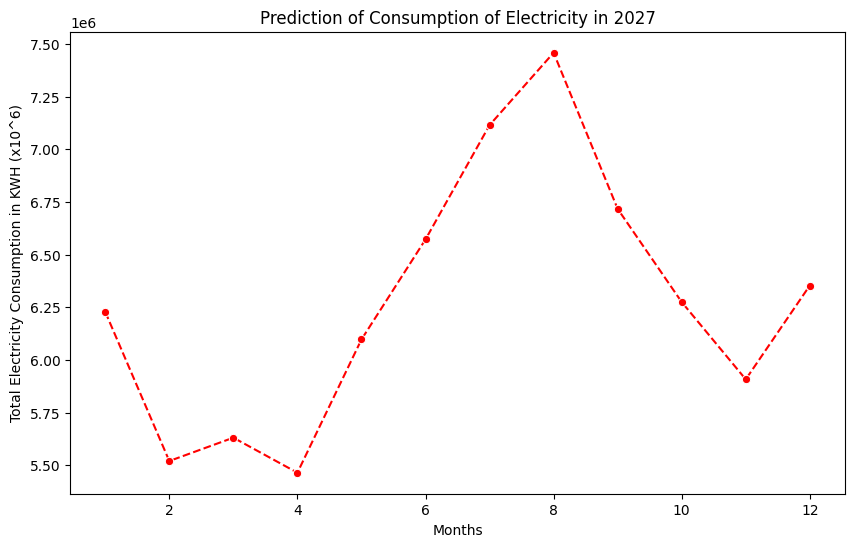

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(data=future_data, x='Month', y='TotalKWH', color='red', marker='o', linestyle='--')

# Set the axis labels and title

plt.xlabel('Months')
plt.ylabel('Total Electricity Consumption in KWH (x10^6)')
plt.title('Prediction of Consumption of Electricity in 2027')

# Show the plot
plt.show()
plt.savefig("predicted.png")